In [1]:
# Import Pandas library
import pandas as pd

# Import the StandardScaler object
from sklearn.preprocessing import StandardScaler

from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
# Load datafile

maternal_risk_data = pd.read_csv('Maternal Health Risk Data Set.csv', sep = ',')
maternal_risk_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
crosstab_Age_RiskLevel = pd.crosstab(maternal_risk_data['Age'], maternal_risk_data['RiskLevel'])
crosstab_Age_RiskLevel

RiskLevel,high risk,low risk,mid risk
Age,,,
10,0,2,2
12,7,15,13
13,3,2,7
14,3,0,0
15,0,56,4
16,0,10,6
17,24,18,21
18,0,8,11
19,2,28,37


In [4]:
crosstab_BodyTemp_RiskLevel = pd.crosstab(maternal_risk_data['BodyTemp'], maternal_risk_data['RiskLevel'])
crosstab_BodyTemp_RiskLevel

RiskLevel,high risk,low risk,mid risk
BodyTemp,,,
98.0,199,359,246
98.4,0,2,0
98.6,1,0,0
99.0,2,6,2
100.0,5,2,13
101.0,34,14,50
102.0,25,18,23
103.0,6,5,2


In [5]:
crosstab_HeartRate_RiskLevel = pd.crosstab(maternal_risk_data['HeartRate'], maternal_risk_data['RiskLevel'])
crosstab_HeartRate_RiskLevel

RiskLevel,high risk,low risk,mid risk
HeartRate,,,
7,0,2,0
60,20,33,21
65,0,2,3
66,25,44,18
67,5,2,5
68,0,0,2
70,43,126,102
75,6,7,6
76,20,55,56


In [6]:
crosstab_SystolicBP_RiskLevel = pd.crosstab(maternal_risk_data['SystolicBP'], maternal_risk_data['RiskLevel'])
crosstab_SystolicBP_RiskLevel

RiskLevel,high risk,low risk,mid risk
SystolicBP,,,
70,0,5,2
75,0,8,0
76,0,16,0
78,0,3,0
80,0,5,0
83,2,0,0
85,13,11,19
90,33,72,49
95,1,8,3


In [7]:
crosstab_DiastolicBP_RiskLevel = pd.crosstab(maternal_risk_data['DiastolicBP'], maternal_risk_data['RiskLevel'])
crosstab_DiastolicBP_RiskLevel

RiskLevel,high risk,low risk,mid risk
DiastolicBP,,,
49,0,25,0
50,0,16,8
60,34,75,65
63,2,2,4
65,14,41,32
68,0,2,0
69,1,0,0
70,10,38,52
75,12,15,11


In [8]:
crosstab_BS_RiskLevel = pd.crosstab(maternal_risk_data['BS'], maternal_risk_data['RiskLevel'])
crosstab_BS_RiskLevel

RiskLevel,high risk,low risk,mid risk
BS,,,
6.00,0,7,14
6.10,2,32,19
6.30,2,0,0
6.40,0,8,2
6.50,0,1,0
6.60,0,2,0
6.70,0,10,23
6.80,10,37,41
6.90,8,47,58


In [9]:
key_vars = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
input_data = maternal_risk_data[key_vars]
input_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [10]:
prediction = maternal_risk_data['RiskLevel']
prediction.head()

0    high risk
1    high risk
2    high risk
3    high risk
4     low risk
Name: RiskLevel, dtype: object

In [11]:
# Print the shape of input and prediction
print(f"Shape of x: {input_data.shape}")
print(f"Shape of y: {prediction.shape}")

Shape of x: (1014, 6)
Shape of y: (1014,)


In [12]:
scaler = StandardScaler() # StandardScaler object
x_scaled_transform = scaler.fit_transform(input_data) # Fitting the transform to scaler object

x_scaled = pd.DataFrame(x_scaled_transform, columns=input_data.columns, index=input_data.index)

# Print mean and standard deviation of each column in x_scaled
print("Mean of x_scaled:")
print('Printing numerically rounded values for MEAN of x_scaled')
print(round(x_scaled.mean(),2))
print("\nStandard deviation of x_scaled:")
print(x_scaled.std())

# Print the head of x_scaled_df
x_scaled.head()

Mean of x_scaled:
Printing numerically rounded values for MEAN of x_scaled
Age           -0.0
SystolicBP    -0.0
DiastolicBP    0.0
BS            -0.0
BodyTemp       0.0
HeartRate      0.0
dtype: float64

Standard deviation of x_scaled:
Age            1.000493
SystolicBP     1.000493
DiastolicBP    1.000493
BS             1.000493
BodyTemp       1.000493
HeartRate      1.000493
dtype: float64


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,-0.361738,0.913396,0.255023,1.905890,-0.485215,1.446956
1,0.380777,1.457027,0.975539,1.298340,-0.485215,-0.532088
2,-0.064732,-1.261127,-0.465493,-0.220537,0.973884,0.704815
3,0.009519,1.457027,0.615281,-0.524312,-0.485215,-0.532088
4,0.380777,0.369765,-1.186009,-0.797710,-0.485215,0.210054


In [13]:
# Splitting x_scaled dataframe into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, prediction, random_state=0)

scaler = StandardScaler() # StandardScaler object

# Fitting the scaler to the training dataset (x_train)
scaler.fit(x_train)

# Transform the training and testing datasets
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

# Print the shapes of the resulting arrays
print(f"Shape of x_train_scaled: {x_train_scale.shape}")
print(f"Shape of x_test_scaled: {x_test_scale.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train_scaled: (760, 6)
Shape of x_test_scaled: (254, 6)
Shape of y_train: (760,)
Shape of y_test: (254,)


In [14]:
clf1 = svm.SVC() # Creating a new SVM classifier object
clf1.fit(x_train_scale, y_train) # Fit the classifier to the training data

# Make predictions on the testing data
predictions1 = clf1.predict(x_test_scale)

# Calculating accuracy score
score1 = accuracy_score(y_test, predictions1)

# Print the accuracy score (score1)
print(f"Accuracy score for SVM classifier: {score1:.2f}")

Accuracy score for SVM classifier: 0.67


In [15]:
# Loop over predicted and true values in the test set
for BS, true_risk_level, predicted_risk_level in zip(x_test.index, y_test, predictions1):
    if true_risk_level != predicted_risk_level:
        print(f"{BS} : {true_risk_level} -> {predicted_risk_level}")

854 : mid risk -> low risk
85 : mid risk -> low risk
493 : low risk -> mid risk
780 : mid risk -> low risk
825 : mid risk -> low risk
814 : mid risk -> low risk
587 : mid risk -> low risk
798 : mid risk -> low risk
295 : high risk -> mid risk
14 : mid risk -> high risk
744 : mid risk -> low risk
462 : mid risk -> low risk
420 : mid risk -> low risk
613 : high risk -> mid risk
351 : mid risk -> low risk
799 : mid risk -> low risk
676 : high risk -> mid risk
1006 : high risk -> mid risk
829 : mid risk -> low risk
97 : mid risk -> low risk
641 : high risk -> mid risk
403 : mid risk -> low risk
877 : low risk -> mid risk
240 : high risk -> mid risk
915 : low risk -> mid risk
2 : high risk -> mid risk
951 : low risk -> mid risk
331 : mid risk -> high risk
833 : mid risk -> high risk
790 : mid risk -> low risk
815 : mid risk -> low risk
590 : mid risk -> low risk
731 : mid risk -> high risk
895 : low risk -> high risk
783 : mid risk -> low risk
837 : mid risk -> low risk
760 : mid risk -> lo

In [16]:
# Creating a DecisionTreeClassifier object
clf2 = tree.DecisionTreeClassifier(random_state=0)

# Fit the classifier to the training data
clf2.fit(x_train_scale, y_train)

# Predictions on the testing data
predictions2 = clf2.predict(x_test_scale)

# Calculating accuracy score
score2 = accuracy_score(y_test, predictions2)

# Print the accuracy score
print(f"Accuracy score for Decision Tree classifier: {score2:.2f}")

Accuracy score for Decision Tree classifier: 0.79


In [17]:
# Empty lists to store scores for clf1 and clf2
clf1_scores = []
clf2_scores = []

# Loop 20 times
for _ in range(20):
    # Split the data into training and testing sets (random split each time)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, prediction)        
    scaler = StandardScaler() # StandardScaler object
    scaler.fit(x_train) # Fit the scaler to the training data
    
    # Transform the training and testing data separately
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Creating classifiers
    clf1 = svm.SVC()
    clf2 = tree.DecisionTreeClassifier(random_state=0)
    
    # Fitting classifiers to the scaled training data
    clf1.fit(x_train_scaled, y_train)
    clf2.fit(x_train_scaled, y_train)
    
    # Predictions on the testing data
    predictions1 = clf1.predict(x_test_scaled)
    predictions2 = clf2.predict(x_test_scaled)
    
    # Calculate accuracy scores
    score1 = accuracy_score(y_test, predictions1)
    score2 = accuracy_score(y_test, predictions2)
    
    # Append scores to the lists
    clf1_scores.append(score1)
    clf2_scores.append(score2)
    
    # Print scores and their difference
    print(f"SVM Classifier Score: {score1:.2f} | Decision Tree Classifier Score: {score2:.2f} | Difference: {score1 - score2:.2f}")

SVM Classifier Score: 0.72 | Decision Tree Classifier Score: 0.81 | Difference: -0.09
SVM Classifier Score: 0.71 | Decision Tree Classifier Score: 0.80 | Difference: -0.09
SVM Classifier Score: 0.70 | Decision Tree Classifier Score: 0.83 | Difference: -0.13
SVM Classifier Score: 0.69 | Decision Tree Classifier Score: 0.83 | Difference: -0.14
SVM Classifier Score: 0.68 | Decision Tree Classifier Score: 0.83 | Difference: -0.16
SVM Classifier Score: 0.70 | Decision Tree Classifier Score: 0.83 | Difference: -0.13
SVM Classifier Score: 0.71 | Decision Tree Classifier Score: 0.84 | Difference: -0.13
SVM Classifier Score: 0.66 | Decision Tree Classifier Score: 0.85 | Difference: -0.19
SVM Classifier Score: 0.72 | Decision Tree Classifier Score: 0.79 | Difference: -0.07
SVM Classifier Score: 0.75 | Decision Tree Classifier Score: 0.83 | Difference: -0.08
SVM Classifier Score: 0.69 | Decision Tree Classifier Score: 0.85 | Difference: -0.16
SVM Classifier Score: 0.69 | Decision Tree Classifier 

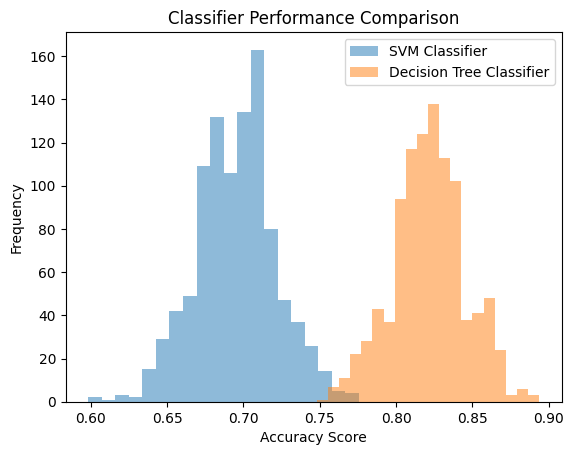

In [18]:
# Initialize empty lists to collect scores
all_scores1 = []
all_scores2 = []

# Loop 1000 times
for _ in range(1000):
    # Split the data into training and testing sets (random split each time)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, prediction)        
    scaler = StandardScaler() # StandardScaler object
    scaler.fit(x_train) # Fit the scaler to the training data
    
    # Transform the training and testing data separately
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Creating classifiers
    clf1 = svm.SVC()
    clf2 = tree.DecisionTreeClassifier(random_state=0)
    
    # Fitting classifiers to the scaled training data
    clf1.fit(x_train_scaled, y_train)
    clf2.fit(x_train_scaled, y_train)
    
    # Predictions on the testing data
    predictions1 = clf1.predict(x_test_scaled)
    predictions2 = clf2.predict(x_test_scaled)
    
    # Calculate accuracy scores
    score1 = accuracy_score(y_test, predictions1)
    score2 = accuracy_score(y_test, predictions2)
    
     # Append scores to the lists
    all_scores1.append(score1)
    all_scores2.append(score2)
    
# Create histograms
plt.hist(all_scores1, bins=20, alpha=0.5, label='SVM Classifier')
plt.hist(all_scores2, bins=20, alpha=0.5, label='Decision Tree Classifier')

plt.xlabel('Accuracy Score')   # x-axis label
plt.ylabel('Frequency')        # y-axis label
plt.title('Classifier Performance Comparison') # Title for the plot
plt.legend()

# Show the plot
plt.show() 

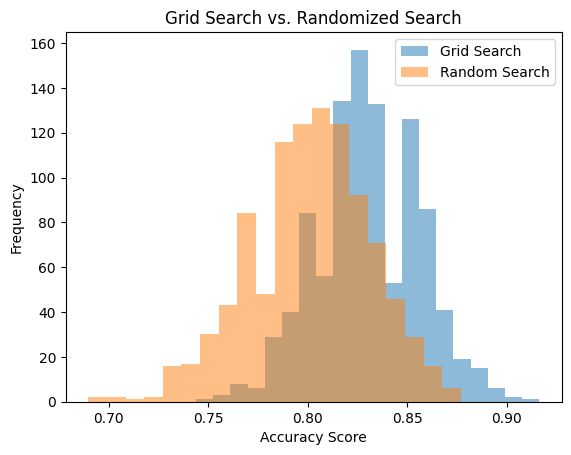

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

grid_scores = []
rand_scores = []

for _ in range(1000):
    # Split the data into training and testing sets (random split each time)
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, prediction, test_size=0.2)        
    scaler = StandardScaler() # StandardScaler object
    scaler.fit(x_train) # Fit the scaler to the training data
    
    # Transform the training and testing data separately
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Creating classifiers
    clf = tree.DecisionTreeClassifier(random_state=0)
    clf.fit(x_train_scaled, y_train)

    # Trying to maximize the accuracy of the decision tree classifier with grid search
    grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': [None, 'sqrt', 'log2']
    }

    # Instantiating GridSearchCV
    grid_search = GridSearchCV(estimator=clf, param_grid=grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(x_train_scaled, y_train)

    # Best model for grid search
    best_model_grid = grid_search.best_estimator_

    # Also trying with randomized search
    rand = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None] + list(np.arange(10, 51, 10)),
        'min_samples_split': np.arange(2, 21, 2),
        'min_samples_leaf': np.arange(1, 11, 1),
       'max_features': [None, 'sqrt', 'log2']
    }

    # Instantiate RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=rand, n_iter=100, cv=5, n_jobs=-1, verbose=0, random_state=0, scoring='accuracy')

    # Fit RandomizedSearchCV
    random_search.fit(x_train_scaled, y_train)

    # Best model for random search
    best_model_rand = random_search.best_estimator_

    # Predicting with both models
    y_pred_grid = best_model_grid.predict(x_test_scaled)
    y_pred_rand = best_model_rand.predict(x_test_scaled)

    # Finding accuracy scores for both models
    grid_score = accuracy_score(y_test, y_pred_grid)
    rand_score = accuracy_score(y_test, y_pred_rand)

    # Adding scores to lists
    grid_scores.append(grid_score)
    rand_scores.append(rand_score)

# Plotting histograms of the scores for each best model
plt.hist(grid_scores, bins=20, alpha=0.5, label='Grid Search')
plt.hist(rand_scores, bins=20, alpha=0.5, label='Random Search')

plt.xlabel('Accuracy Score')   # x-axis label
plt.ylabel('Frequency')        # y-axis label
plt.title('Grid Search vs. Randomized Search') # Title for the plot
plt.legend()

# Show the plot
plt.show() 

    

In [35]:
print(f'Mean grid search accuracy score: {np.mean(grid_scores)}')
print(f'Mean grid search accuracy score: {np.mean(rand_scores)}')

Mean grid search accuracy score: 0.82971921182266
Mean grid search accuracy score: 0.8009261083743843


In [42]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


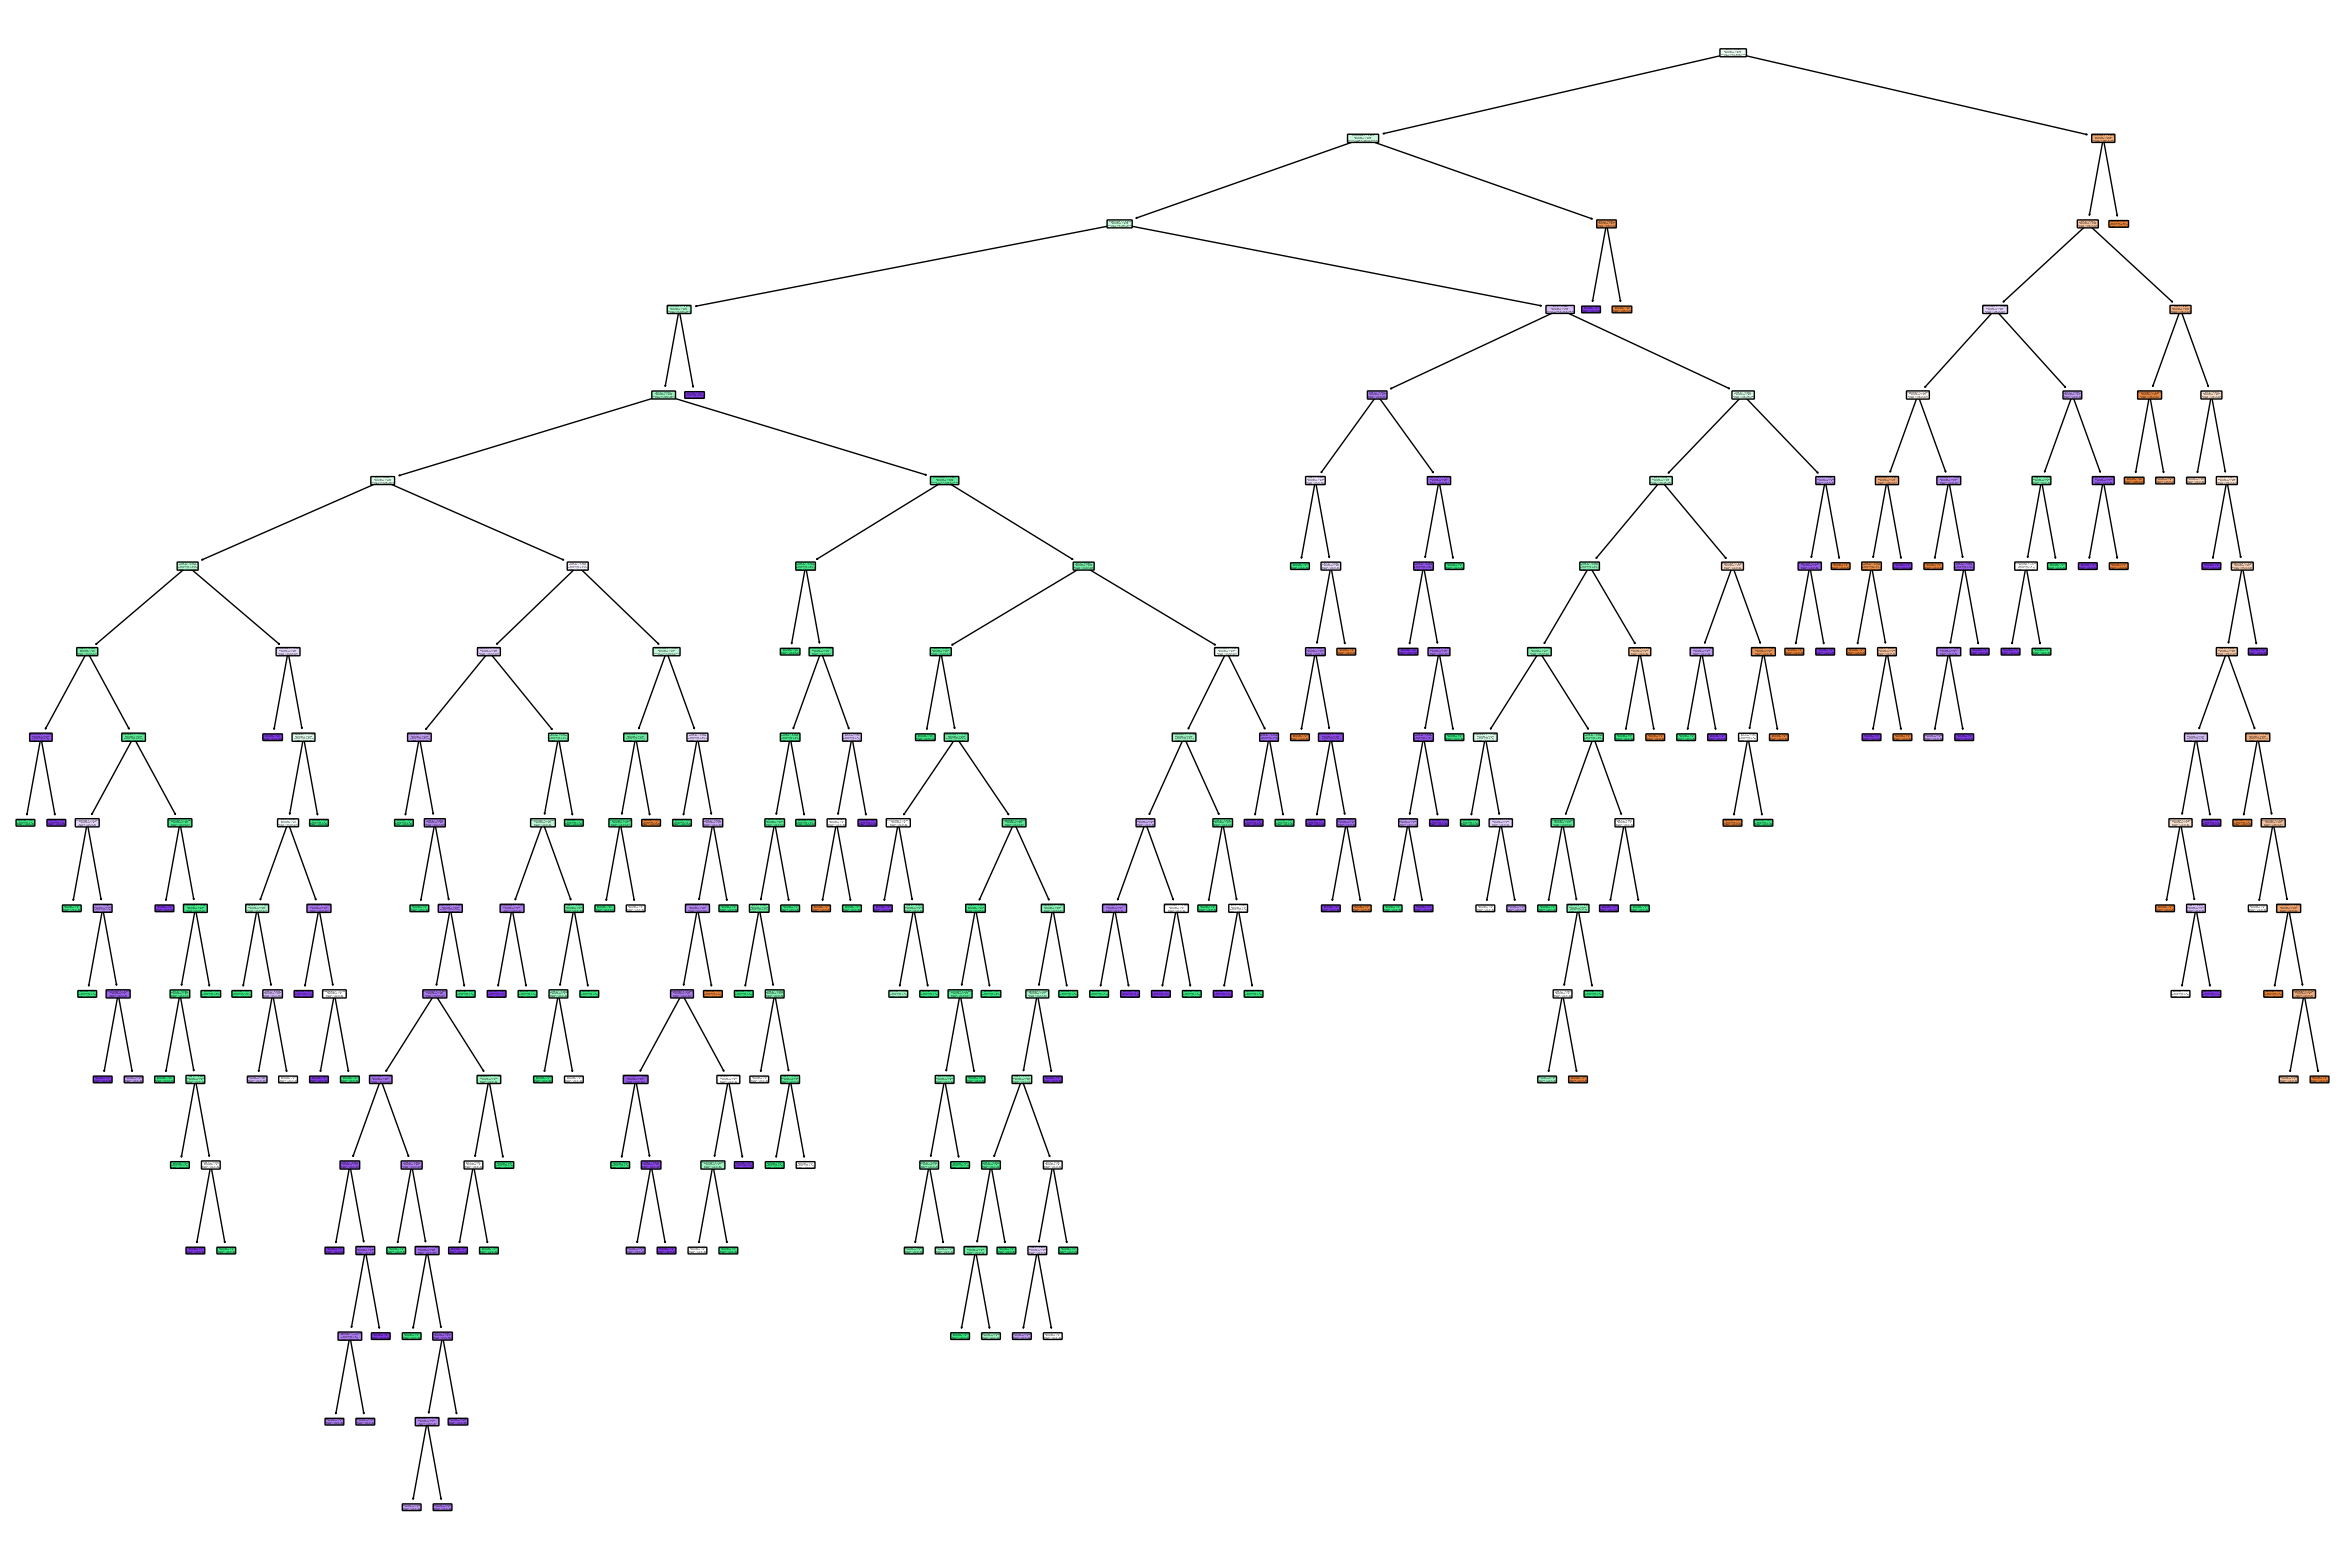

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 20))
plot_tree(best_model_grid, filled=True, feature_names=x_test.columns, class_names=maternal_risk_data['RiskLevel'], rounded=True)
plt.show()

In [55]:
# Since the above figure is too hard to read, trying to only display the most important features
feature_importances = best_model_grid.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Printing feature ranking
for f in range(x_scaled.shape[1]):
    print(f'{f + 1} feature {indices[f]} ({feature_importances[indices[f]]}) - {x_scaled.columns[indices[f]]}')

# Visualizing tree again using top 3 features
top_features = indices[:3]
X_top = x_scaled.iloc[:, top_features]

# Split the dataset again based on top features
X_train_top, X_test_top, y_train, y_test = train_test_split(X_top, prediction, test_size=0.2, random_state=0)

# Fit the model on the top features
best_model_grid.fit(X_train_top, y_train)



1 feature 0 (0.4483505014931831) - Age
2 feature 2 (0.28694687380415185) - DiastolicBP
3 feature 1 (0.26470262470266503) - SystolicBP


IndexError: index 3 is out of bounds for axis 0 with size 3

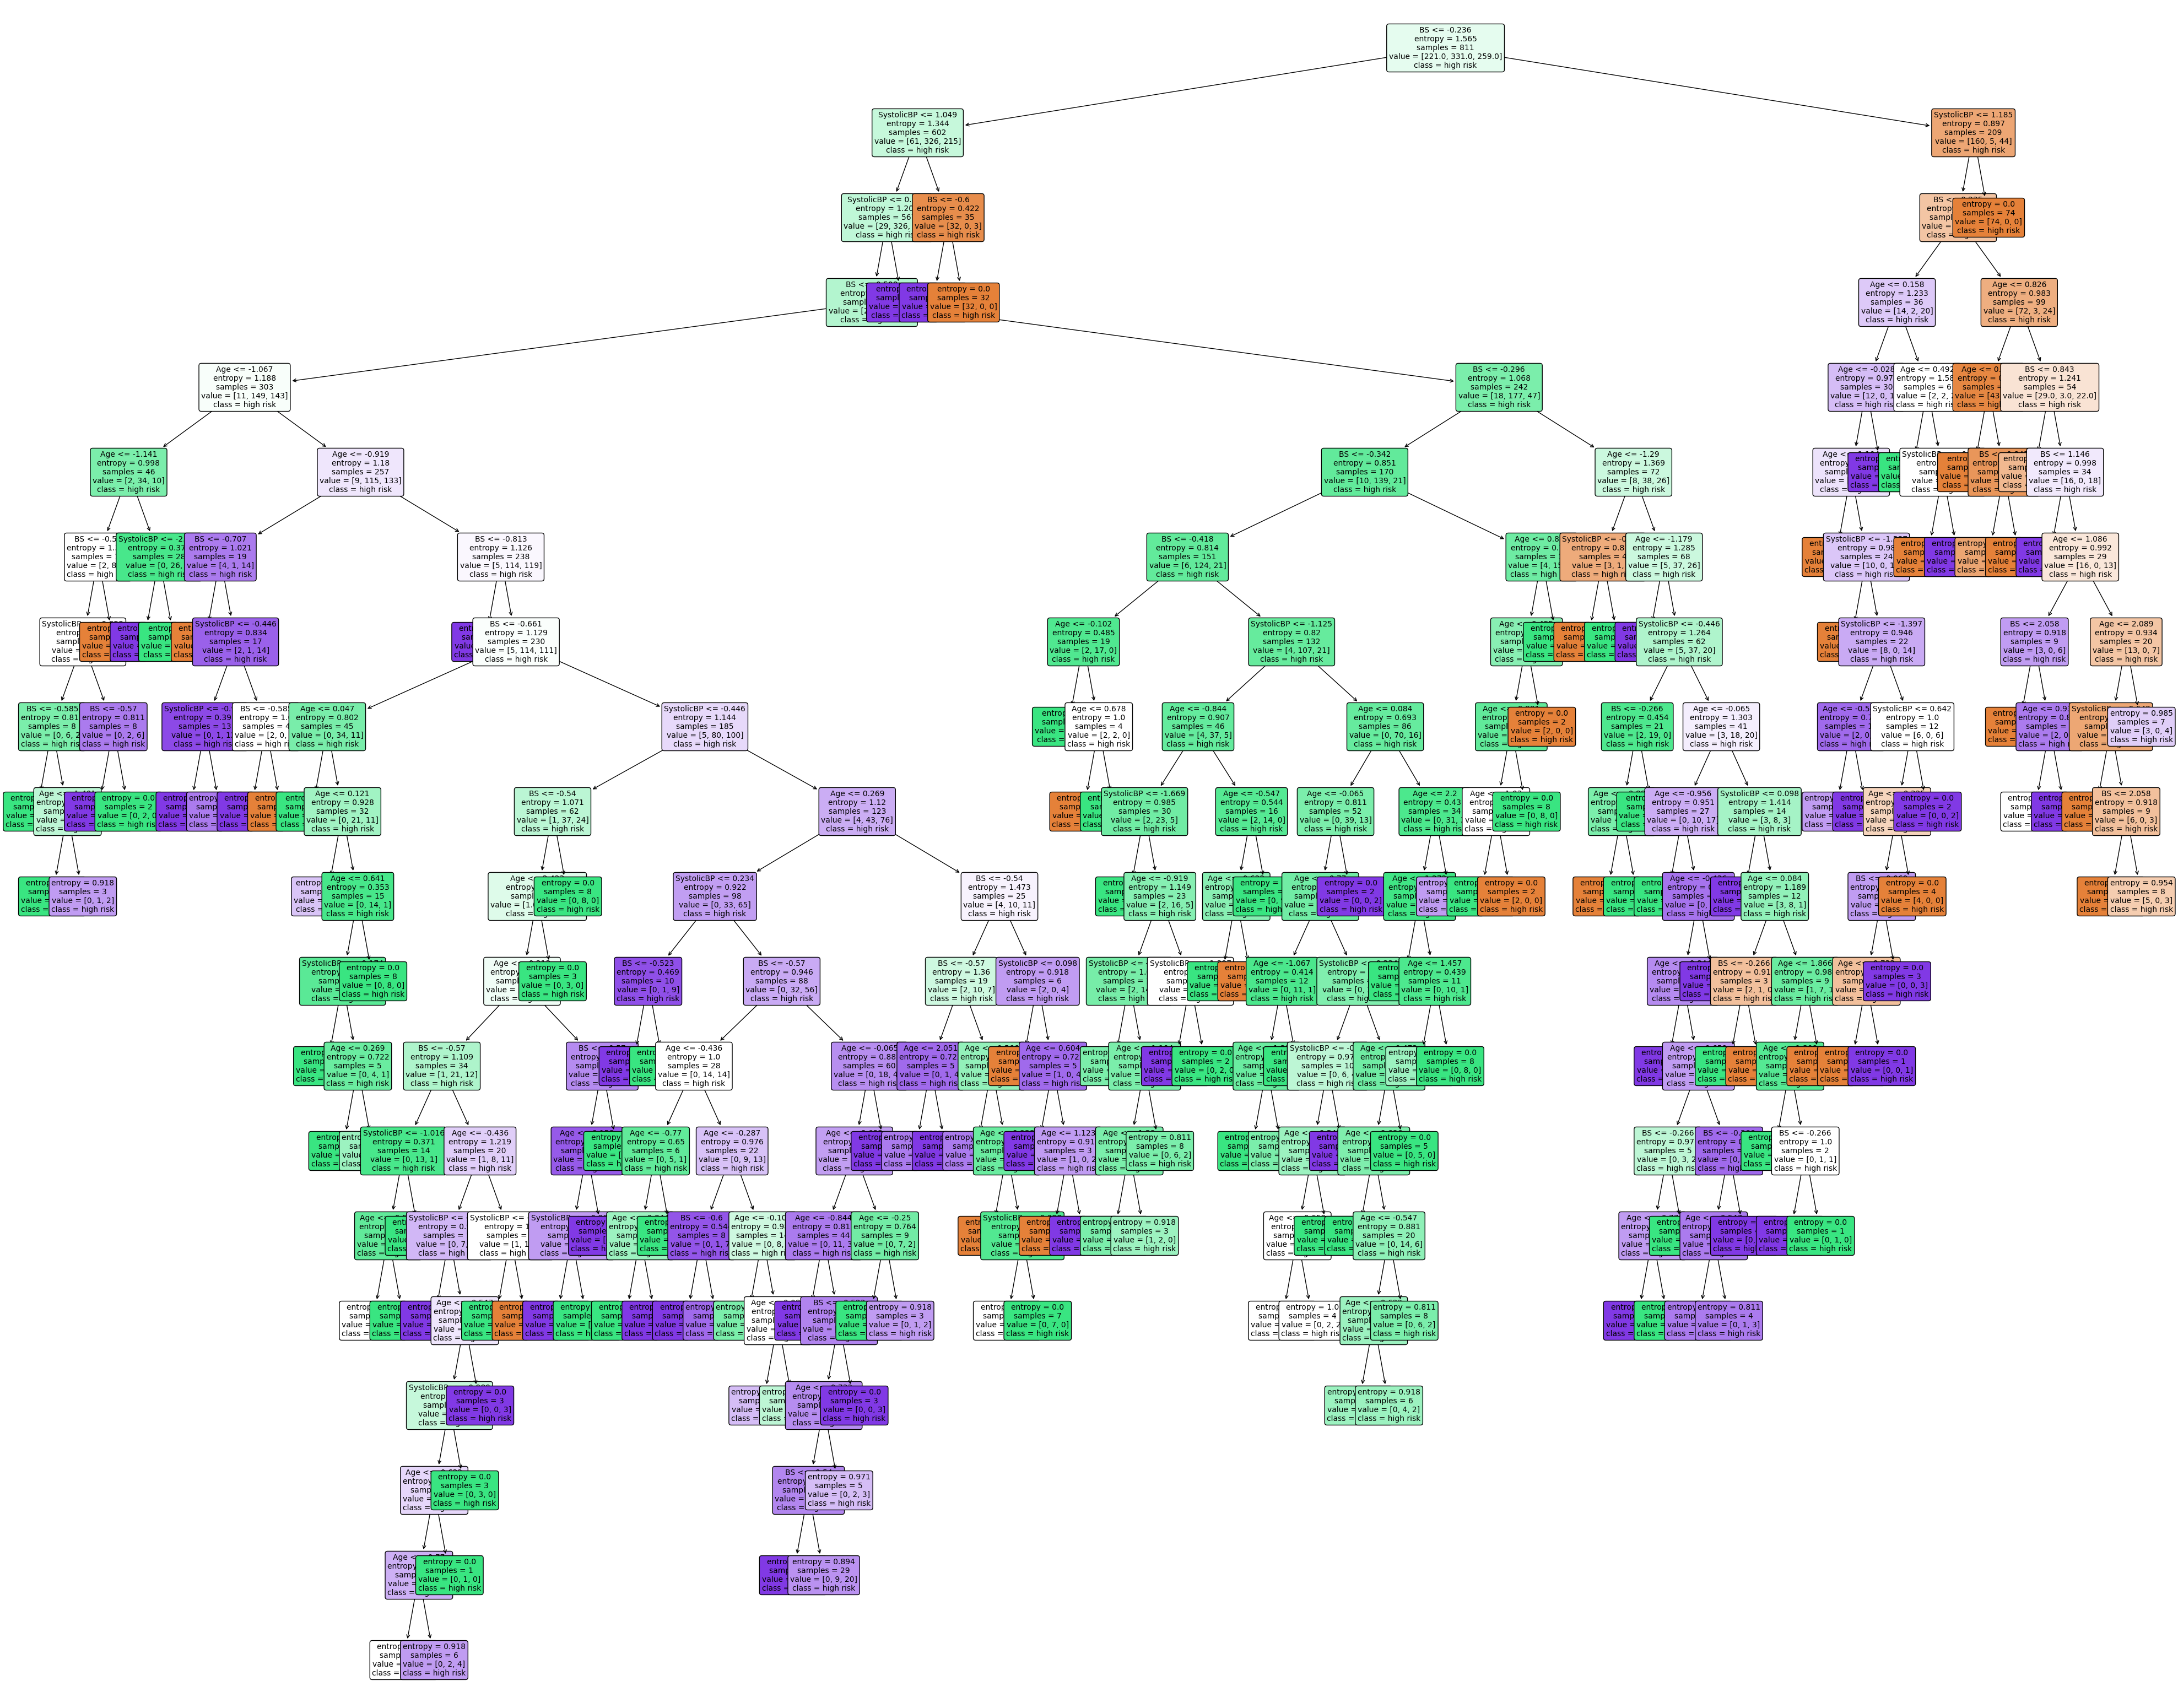

In [56]:
# Visualize the decision tree
plt.figure(figsize=(50, 40))
plot_tree(best_model_grid, filled=True, feature_names=x_scaled.columns[top_features], class_names=maternal_risk_data['RiskLevel'], 
          rounded=True, fontsize=10)
plt.show()

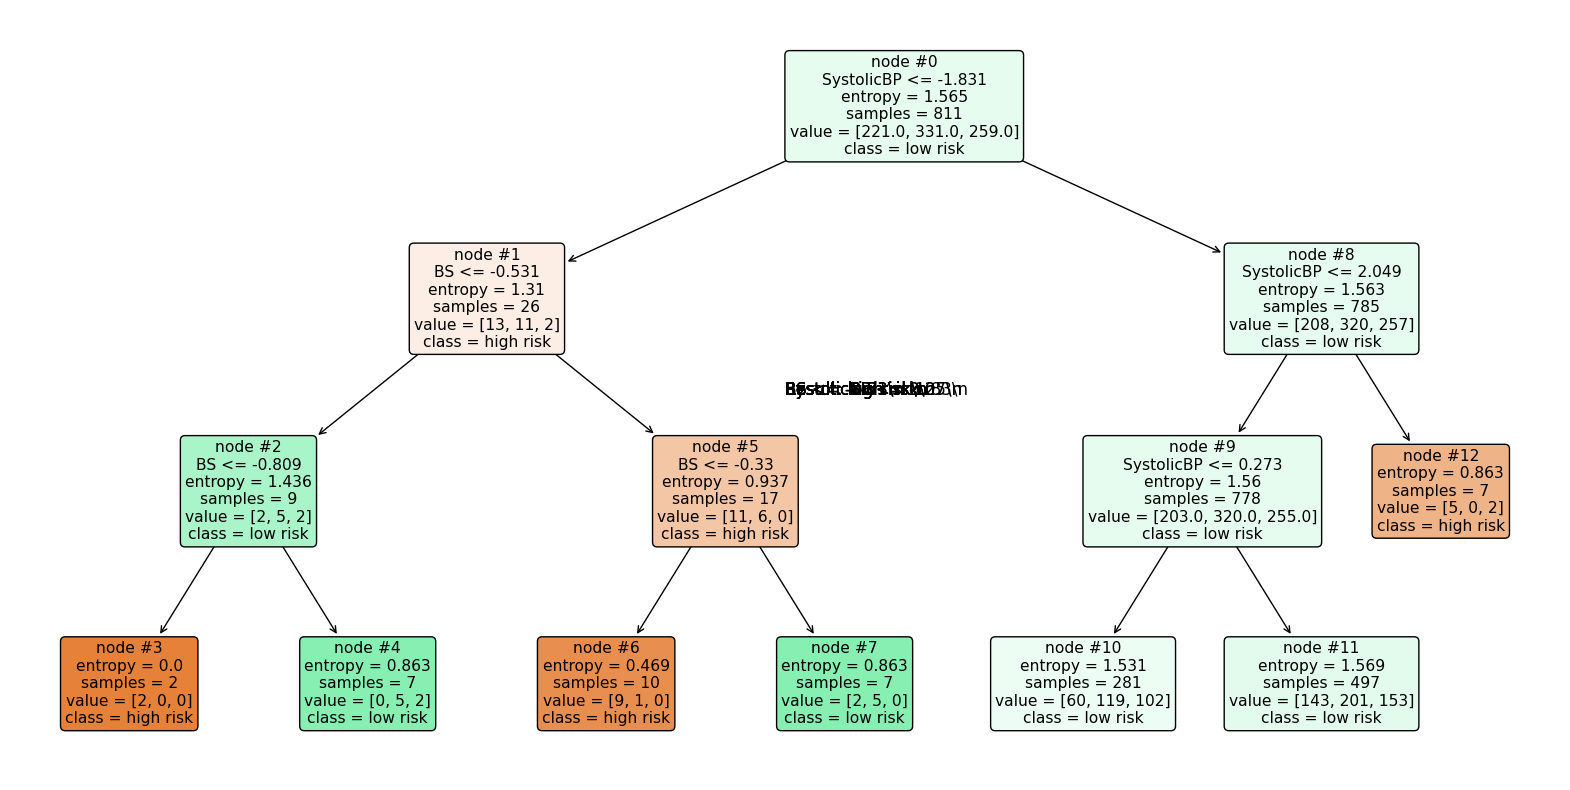

In [61]:
best_model_grid.set_params(max_depth=3)
best_model_grid.fit(x_train_scaled, y_train)

def get_node_label(clf, feature_names, class_names):
    tree_ = clf.tree_
    feature_name = [
        feature_names[i] if i != -2 else "leaf"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            return f"{name} <= {threshold:.2f}\\n"
        else:
            class_name = class_names[np.argmax(tree_.value[node])]
            return f"Result: {class_name}\\n"

    labels = [recurse(i, 0) for i in range(tree_.node_count)]
    return labels

# Generate custom labels
labels = get_node_label(best_model_grid, x_scaled.columns, maternal_risk_data['RiskLevel'].unique())

# Plot tree with custom labels for readability
plt.figure(figsize=(20, 10))
plot_tree(best_model_grid, filled=True, feature_names=x_scaled.columns, class_names=maternal_risk_data['RiskLevel'].unique(), 
          rounded=True, node_ids=True) 
ax = plt.gca()
for i, txt in enumerate(labels):
    ax.text(0.5, 0.5, txt, transform=ax.transAxes, fontsize = 12)
plt.show()